# DV workshop 1 - Basic data manipulation and plotting

This notebook shows you how to produce a simple plot using the Matplolib API, then how to load a dataset, manipulate the data and produce several basic charts using pandas. It is also an example of **reproducible research**.

### Reproducible research

Reproducible research means that someone else could, in principle, redo all your actions. Reproducible research is all about **transparancy**. It has nothing to do with correctness or reliability. Your research can be reproducible, yet completely false, unreliable and drawing the wrong conclusions. So why is it important then?

Reproducible research is important because, even though you can never guarantee that your work is correct, you at least ensure that others have full insight into what you have done. Your lecturers can assess your work, and the company that wants to use your result can build further on your work.

In this minor we advise you to use a quite specific workflow to create reproducible research. It consists of the following rules:

* You shall use Jupyter Notebooks to combine your research report (documentation) with Python source code and its output in the form of data, tables and figures.
* You shall use a version control system (Git is recommended) to track your changes and create a backed-up project folder and that will be the basis of your portfolio for this minor.
* You shall include all data used in the data analysis in its rawest form (or link to it if it is too large to store). You can store processed data but do it separately and annotate it as such. All data sets should be accompanied with a document describing the data, a so-called codebook.
* You will **NOT** change the raw data by hand (e.g. rounding numbers, deleting unwanted entries), but you will do this in code in a Notebook.
* You will **NOT** use a GUI based program to edit or visualize data and include it as reproducible research. You can use such tools for data exploration or to produce more esthetic visualizations based on reproducible visualizations.
* You can save and use intermediate results in your Notebooks, but there should be a separate Notebook to produce those results.

These rules are based on: Reproducible Research Checklist by Robert Peng from the Reproducible Research MOOC on Coursera. (Last checked September 1, 2017) [https://github.com/rdpeng/courses/blob/master/05_ReproducibleResearch/lectures/Checklist.pdf]


## 1. Matplotlib

First, we import the required libraries, using standard conventions. We first import **numpy** for all our mathematical needs, then the **matplotlib** as plotting library and **pyplot** which gives an easy API to create plots with matplotlib.

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# we need the following line to indicate that the plots should be shown inline with the Jupyter notebook.
%matplotlib inline

We will first create a simple plot of a mathematical function. We first create a numpy array of x-values. Then for each x-value we create the y-value, i.e. the function value. Plotting this function is as easy as giving it the x and y values.

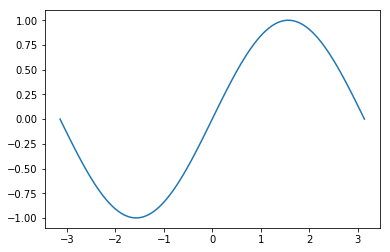

In [2]:
X = np.linspace(-np.pi, np.pi, 100) # define a NumPy array with 100 points in the range -Pi to Pi
Y = np.sin(X) # define the curve Y by the sine of X

plt.plot(X,Y); # use matplotlib to plot the function

While creating such plots is perfectly fine when you are exploring data, in your final notebook the plot is hard to understand for the reader. With matplotlib it is very easy to add labels, a title and a legend. You can also change the limits of the plot, the style of the lines and much more.

The following could be seen as the bare minimum for a plot to be understood as part of reproducible research.

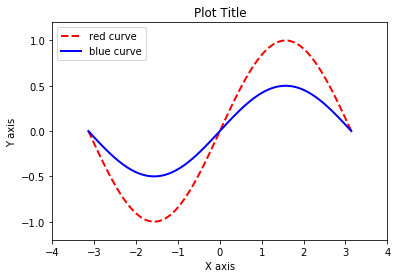

In [3]:
plt.figure()
plt.plot(X, Y, 'r--', linewidth=2)
plt.plot(X, Y/2, 'b-', linewidth=2)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Plot Title')
plt.xlim(-4, 4)
plt.ylim(-1.2, 1.2)
plt.legend(['red curve', 'blue curve'], loc='best');

Go to the documentation pages of matplotlib [http://matplotlib.org/contents.html] to find all the possible options for a plot and also to see more tutorials, videos and book chapters to help you along the way.

A few other nice tutorials:
* [http://www.labri.fr/perso/nrougier/teaching/matplotlib/]


## 2. Loading data CSV and Pandas

While reproducible research recommends having your data somewhere where you know it will not change, it may not be feasible to put large datafiles in your portfolio. We will work with a database of information about cities around the world:

https://www.maxmind.com/en/free-world-cities-database

Working with data structures can be done in many ways in Python. There are the standard Python arrays, lists and tuples. You can also use the arrays in the numpy package which allow you to do heavy math operations efficiently. For data analysis Pandas is often used, because data can be put into so-called dataframes. Data-frames store data with column and row names and can easily be manipulated and plotted. You will learn more about Pandas in the Machine Learning workshops. A short intro can be found here:

http://pandas.pydata.org/pandas-docs/stable/10min.html



In [4]:
#
import urllib.request as urllib, zipfile, os

#
url = 'http://download.maxmind.com/download/worldcities/'
filename = 'worldcitiespop.txt.gz'
datafolder = 'data/'

#
downloaded = urllib.urlopen(url + filename)
buf = downloaded.read()

try:
    os.mkdir(datafolder)
except FileExistsError:
    pass

with open(datafolder + filename, 'wb') as f:
    f.write(buf)

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
cities = pd.read_csv(datafolder + filename, sep=',', low_memory=False, encoding = 'ISO-8859-1')

## 3. Data inspection and manipulation

We can take a peek at the data by checking out the top and bottom rows of data. Do you see any potential problem with this dataset?

In [6]:
cities.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,06,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,06,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,06,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,06,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,06,NaN,42.466667,1.483333


In [7]:
cities.tail()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
3173953,zw,zimre park,Zimre Park,04,NaN,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,00,NaN,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,04,NaN,-17.758889,31.010556
3173956,zw,zuzumba,Zuzumba,06,NaN,-20.033333,27.933333
3173957,zw,zvishavane,Zvishavane,07,79876.0,-20.333333,30.033333


Let's count the missing values.

In [8]:
def count_missing(x):
  return sum(x.isnull())
print("Missing values per column:")
print(cities.apply(count_missing, axis=0))

Missing values per column:
Country             0
City                6
AccentCity          0
Region              8
Population    3125978
Latitude            0
Longitude           0
dtype: int64


We do not really mind the 6 cities without a name or the 8 ones without a Region, but we'll filter them out anyway. Population data missing is a bigger problem, but we decide not to drop or fill, for now. 
See https://chrisalbon.com/python/pandas_missing_data.html for a short clear example of what can be done with pandas about missing data.

In [9]:
# filter out cities with no name or no region
cities.dropna(subset=['City'],inplace=True)
cities.dropna(subset=['Region'],inplace=True)
cities.apply(count_missing, axis=0)

Country             0
City                0
AccentCity          0
Region              0
Population    3125965
Latitude            0
Longitude           0
dtype: int64

Let us check the biggest cities.

In [10]:
cities.sort_values(by='Population', ascending=False).head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
1544449,jp,tokyo,Tokyo,40,31480498.0,35.685000,139.751389
570824,cn,shanghai,Shanghai,23,14608512.0,31.045556,121.399722
1327914,in,bombay,Bombay,16,12692717.0,18.975000,72.825833
2200161,pk,karachi,Karachi,05,11627378.0,24.905600,67.082200
1331162,in,delhi,Delhi,07,10928270.0,28.666667,77.216667


## 4. Scatter plots

To get an idea of where in the world the cities in the dataset are located, we want to make a scatter plot of the position of all the cities in the dataset. No worry about drawing country borders, let's just plot the locations of the cities.
We will use all the basic plot elements you need to understand this plot.

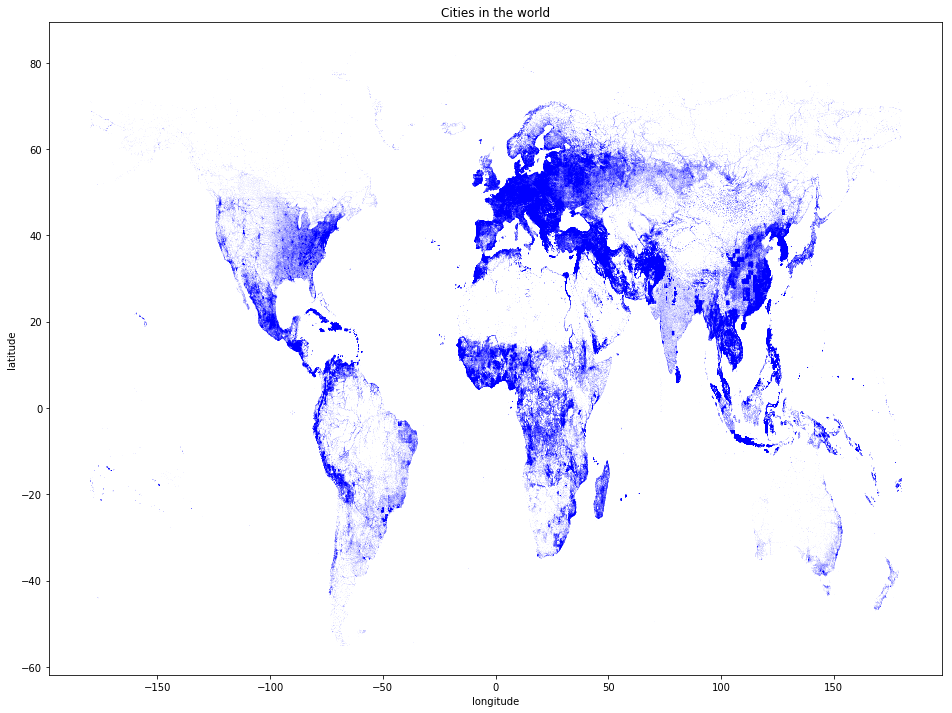

In [11]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=[16,12])
plt.title('Cities in the world')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.scatter(cities.Longitude, cities.Latitude, marker='.',c='b', s=0.01, label='Cities of the world', alpha=0.2)

Now we want to plot the cities in The Netherlands only. We will use a scatter plot again to plot the cities, but now vary the size of the marker and the color with the population of that city. A colorbar will show how the color of the marker relates to its population.
The new limits make sure that only the mainland of The Netherlands is visible (and not the Dutch Antilles).

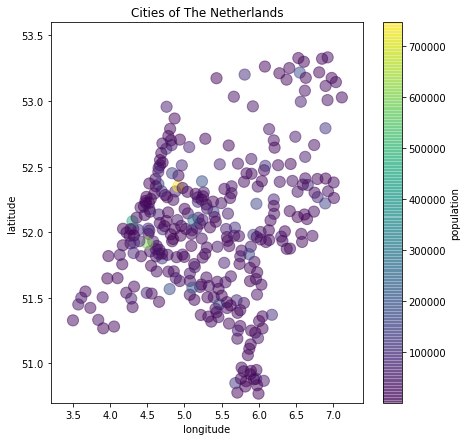

In [12]:
dutch_cities = cities[ cities['Country'] =='nl' ]
plt.figure(figsize=[7,7]);

plt.title('Cities of The Netherlands')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.xlim(3.2,7.4)
plt.ylim(50.7,53.6)
sizes = 500


points=plt.scatter(dutch_cities.Longitude,dutch_cities.Latitude,marker='.'
                   , c=dutch_cities.Population
                   , s=sizes**1
                   , label='Position of Cities Based on Population Density'
                   , alpha=0.5)
plt.colorbar(label='population');


## 5. Histograms

So we could clearly see larger cities such as Amsterdam, Rotterdam and even Eindhoven. But we still do not really have a clear overview of how many big cities are there. To show a distribution we use a histogram plot.

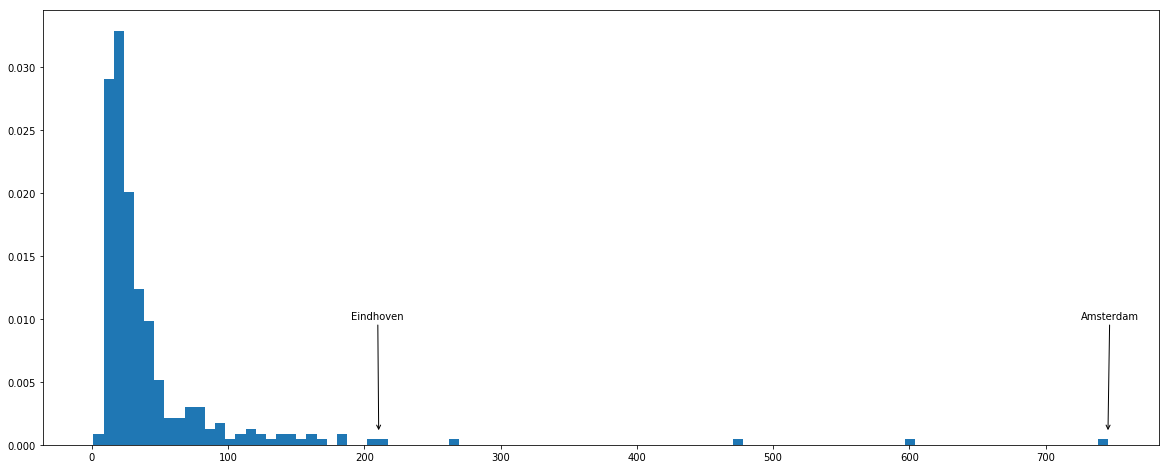

In [13]:
plt.figure(figsize=[20,8])
ax = plt.subplot()

eindhoven = dutch_cities[dutch_cities['City'] == 'eindhoven']
amsterdam = dutch_cities[dutch_cities['City'] == 'amsterdam']
plt.hist(np.asarray(dutch_cities.dropna().Population/1000),100,normed=1)

ax.annotate("Eindhoven",
            xy=(eindhoven.Population.values/1000, .001), xycoords='data',
            xytext=(eindhoven.Population.values/1000 - 20, .010), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )      
ax.annotate("Amsterdam",
            xy=(amsterdam.Population.values/1000, .001), xycoords='data',
            xytext=(amsterdam.Population.values/1000 - 20, .010), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )        

Now we want to compare how the distribution of Dutch cities compares to that of the entire world.
Subplots are used to show the dutch distribution (top plot) and the world distribution (bottom plot).

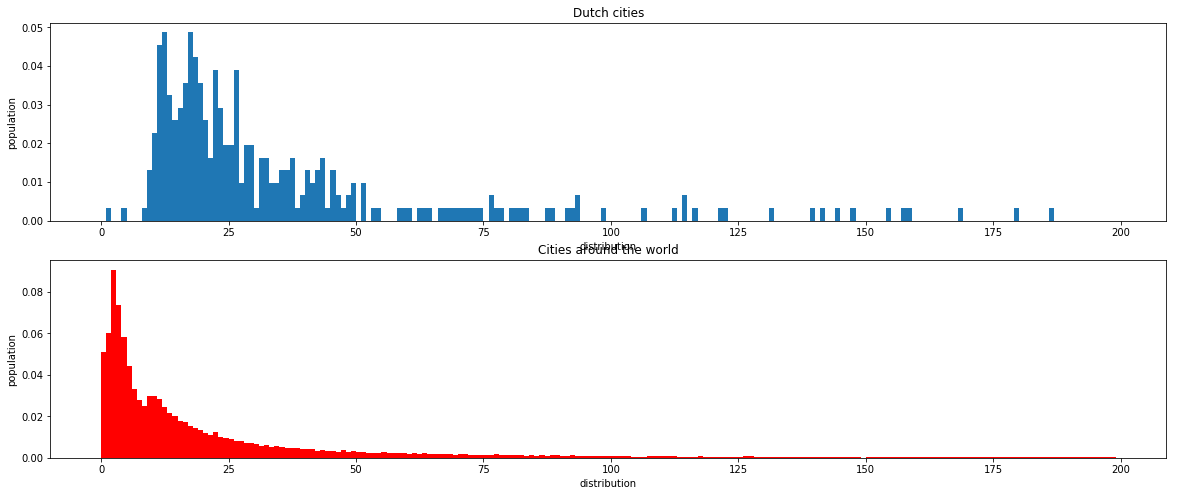

In [15]:
plt.figure(figsize=[20, 8]);
plt.subplot(2,1,1);
plt.hist(np.asarray(dutch_cities.dropna().Population/1000), bins=np.arange(0, 200, 1), normed=1);
plt.title('Dutch cities');
plt.xlabel('distribution');
plt.ylabel('population');
## add the subplot of the world cities below this Dutch one

plt.subplot(2,1,2);
plt.hist(np.asarray(cities.dropna().Population/1000), bins=np.arange(0, 200, 1), normed=1, color='r');
plt.title('Cities around the world');
plt.xlabel('distribution');
plt.ylabel('population');